In [22]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../')

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 200

plt.rcParams['text.usetex'] = False

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

# Example usage of some constants
print(f"Permittivity of free space: {epsilon_0} F/m")
print(f"Permeability of free space: {mu_0} N/A^2")
print(f"Speed of light in vacuum: {c} m/s")
# print(f"Elementary charge: {e} C")
# print(f"Planck constant: {h} J·s")
# print(f"Reduced Planck constant: {hbar} J·s")
print(f"Boltzmann constant: {k} J/K")
# print(f"Newtonian constant of gravitation: {G} m^3/kg/s^2")
# print(f"Electron mass: {m_e} kg")
# print(f"Proton mass: {m_p} kg")
# print(f"Neutron mass: {m_n} kg")
# print(f"Fine-structure constant: {alpha}")
print(f"Electron volt: {eV} J")

def print_engineering_notation(value):
    """
    Print a value in engineering notation (powers of ten in multiples of 3).

    Parameters:
    value (float): The value to be printed in engineering notation.
    """
    
    if value == 0:
        print("0")
        return

    exponent = int(math.floor(math.log10(abs(value)) / 3) * 3)
    mantissa = value / (10 ** exponent)
    
    print(f"{mantissa:.3f}e{exponent}")

# Example usage
print_engineering_notation(0)          # Output: 0
print_engineering_notation(1234.56)    # Output: 1.235e3
print_engineering_notation(0.00123456) # Output: 1.235e-3
print_engineering_notation(-987654)    # Output: -987.654e3
print_engineering_notation(1e9)        # Output: 1.000e9


Permittivity of free space: 8.8541878128e-12 F/m
Permeability of free space: 1.25663706212e-06 N/A^2
Speed of light in vacuum: 299792458.0 m/s
Boltzmann constant: 1.380649e-23 J/K
Electron volt: 1.602176634e-19 J
0
1.235e3
1.235e-3
-987.654e3
1.000e9


$$
t_{\alpha\beta}\left(\theta_{t},\phi_{t},\theta_{i}\right)=\frac{k_{t}^{2}}{\cos\theta_{i}}\left|N_{\alpha\beta}\right|^{2}\frac{\eta_{i}}{\eta_{t}}\frac{1}{2H}S\\

S = \sum_{n=0}^{\infty}\frac{\left(-1\right)^{n}}{2^{2n}\left(n!\right)^{2}}\frac{\left(\eta_{xy}\right)^{2n}}{\left(\frac{1}{2}\eta_{z}^{2}\sigma_{h}^{2}\right)^{\frac{n+1}{H}}}\Gamma\left(\frac{n+1}{H}\right)\\

S=\sum_{n=0}^{\infty}\left(-1\right)^{n}\exp\left(2n\ln2-2\ln\left(n\right)-2\ln\left(n-1\right)!+2n\ln\left(\eta_{xy}\right)-\frac{n+1}{H}\ln\left(\frac{1}{2}\eta_{z}^{2}\sigma_{h}^{2}\right)+\ln\left(\Gamma\left(\frac{n+1}{H}\right)\right)\right)\\

\eta_{xy}=\sqrt{\left(k_{t}\sin\theta_{t}\cos\phi_{t}-k_{i}\sin\theta_{i}\right)^{2}+\left(k_{t}\sin\theta_{t}\sin\phi_{t}\right)^{2}}\\

\eta_{z}=k_{i}\cos\theta_{i}-k_{t}\cos\theta_{t}\\

k_{i,t}=\frac{2\pi f}{\sqrt{\mu_{0}\epsilon_{0}\epsilon_{i,t}^{\prime}}}\\

\eta_{t}=\sqrt{\frac{\mu_{0}}{\epsilon_{s}^{\prime}\epsilon_{0}}}\\

\eta_{i}=\sqrt{\frac{\mu_{0}}{\epsilon_{0}}}\\

N_{hh}=\left[\left(1+R_{h}\right)\cos\theta_{t}+\frac{\eta_{t}}{\eta_{i}}\left(1-R_{h}\right)\cos\theta_{i}\right]\cos\phi_{t}\\

N_{hv}=\left[-\left(1+R_{h}\right)-\frac{\eta_{t}}{\eta_{i}}\left(1-R_{h}\right)\cos\theta_{i}\cos\theta_{t}\right]\sin\phi_{t}\\

N_{vh}=\left[\frac{\eta_{t}}{\eta_{i}}\left(1+R_{v}\right)-\left(1-R_{v}\right)\cos\theta_{i}\cos\theta_{t}\right]\sin\phi_{t}\\

N_{vv}=\left[\frac{\eta_{t}}{\eta_{i}}\left(1+R_{v}\right)\cos\theta_{t}+\left(1-R_{v}\right)\cos\theta_{i}\right]\cos\phi_{t}\\

R_{v}\left(\theta_{i}\right)=\frac{n_{i}\cos\theta_{i}-n_{t}\sqrt{1-\left(\frac{n_{i}}{n_{t}}\sin\theta_{i}\right)^{2}}}{n_{i}\cos\theta_{i}+n_{t}\sqrt{1-\left(\frac{n_{1}}{n_{t}}\sin\theta_{i}\right)^{2}}}\\
R_{h}\left(\theta_{i}\right)=\frac{n_{i}\sqrt{1-\left(\frac{n_{i}}{n_{t}}\sin\theta_{i}\right)^{2}}-n_{2}\cos\theta_{i}}{n_{i}\sqrt{1-\left(\frac{n_{i}}{n_{t}}\sin\theta_{i}\right)^{2}}+n_{2}\cos\theta_{i}}\\
n_{t}=\sqrt{\epsilon_{s}^{\prime}\epsilon_{0}\mu_{0}}\\
n_{i}=\sqrt{\epsilon_{0}\mu_{0}}\\
$$

In [3]:
import numpy as np
from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
)
from scipy.special import loggamma, factorial, gamma
from decimal import Decimal
import decimal

def transmissivity_fBm(
        f, epsilon_i_prime, epsilon_t_prime, sigma_A, H, 
        theta_i, theta_t, phi_t, bistatic_polarization,
        tolerance = 1e-5,
        decimal_precision = int(1e3),
        max_n_convergence = 10.0,
        debug = False
        ):
    
    # Evaluate constants
    omega = 2 * np.pi * f

    lambda_i = c / (f * np.sqrt(epsilon_i_prime)) 
    lambda_t = c / (f * np.sqrt(epsilon_t_prime)) 
    k_i = 2 * np.pi / lambda_i
    k_t = 2 * np.pi / lambda_t

    eta_xy = np.sqrt((k_t * np.sin(theta_t) * np.cos(phi_t) - k_i * np.sin(theta_i))**2 \
                    + (k_t * np.sin(theta_t) * np.sin(phi_t))**2)
    eta_z = k_i * np.cos(theta_i) - k_t * np.cos(theta_t)

    # Evaluate the series S at 0
    n = 0

    first_fraction = ((-1) ** n) / (2**(2*n) * (factorial(n))**2)
    second_fraction = (eta_xy)**(2*n) / (0.5 * eta_z**2 * sigma_A**2)**((n+1)/H)
    third_factor = gamma((n + 1) / H)

    sum = Decimal(first_fraction*second_fraction*third_factor)
    delta_sum_list = [np.log(first_fraction*second_fraction*third_factor)]
    old_log_factorial = np.log(factorial(n))
    accuracy_overflow = False

    # Evaluate the series S from 1 to max_n_convergence
    # or until the terms is less than tolerance
    for n in np.arange(1.0, max_n_convergence + 1.0, 1):

        new_log_factorial = 2 * np.log(n) + old_log_factorial
        old_log_factorial = new_log_factorial
        kernel =  -2 * n * np.log(2) \
            - new_log_factorial \
                + 2 * n * np.log(eta_xy) \
                    - ((n+1) / H)*np.log(0.5 * eta_z**2 * sigma_A**2) \
                        + loggamma((n + 1) / H)
        
        delta_sum = Decimal(np.e)**Decimal(kernel)
        sum += Decimal((-1**n)) * delta_sum
        delta_sum_list.append(kernel)

        if kernel > decimal_precision :
            accuracy_overflow = True

        if n != 0:   
            if tolerance > delta_sum:
                break
    
    # Mask the sum if it exceeded the max n convergence, 
    # or if the decimal precision was not high enough
    terms_to_converge = n

    if terms_to_converge >= max_n_convergence:
        sum = np.nan
        
    if accuracy_overflow:
        sum = np.nan

    ## Calculate the transmissivity
    eta_i = np.sqrt(mu_0 / (epsilon_i_prime * epsilon_0))
    eta_t = np.sqrt(mu_0 / (epsilon_t_prime * epsilon_0))
    n_i = np.sqrt(epsilon_i_prime * epsilon_0 * mu_0)
    n_t = np.sqrt(epsilon_t_prime * epsilon_0 * mu_0)

    R_v = (n_i * np.cos(theta_i) - n_t * np.sqrt(1 - (np.sin(theta_i) * n_i / n_t)**2)) \
        / (n_i * np.cos(theta_i) + n_t * np.sqrt(1 - (np.sin(theta_i) * n_i / n_t)**2))

    R_h = (n_i * np.sqrt(1 - (n_i * np.sin(theta_i) / n_t)**2) - n_t * np.cos(theta_i)) \
        / (n_i * np.sqrt(1 - (n_i * np.sin(theta_i) / n_t)**2) + n_t * np.cos(theta_i))

    if bistatic_polarization == 'hh':
        N_ab = ((1 + R_h) * np.cos(theta_t) + (eta_t / eta_i) * (1 - R_h) * np.cos(theta_i)) * np.cos(phi_t)
    elif bistatic_polarization == 'hv':
        N_ab = (-1 * (1 + R_h) - (eta_t / eta_i) * (1 - R_h) * np.cos(theta_i) * np.cos(theta_t)) * np.sin(phi_t)
    elif bistatic_polarization == 'vh':
        N_ab = ((eta_t / eta_i) * (1 + R_v) - (1 - R_v) * np.cos(theta_i) * np.cos(theta_t)) * np.sin(phi_t)
    elif bistatic_polarization == 'vv':
        N_ab = ((eta_t / eta_i) * (1 + R_v) + (1 - R_v) * np.cos(theta_i))
    else:
        raise(ValueError('bistatic polarization must be \'vv\',  \'vh\',  \'hv\',  or \'hh\''))

    t_ab = (k_t**2 / np.cos(theta_i)) * (eta_i / eta_t) * np.abs(N_ab)**2 * (1 / (2*H)) * float(sum)

    if debug:
        return t_ab, sum, terms_to_converge, accuracy_overflow
    else:
        return t_ab
    
transmissivity_fBm(
    f = 5.373e6, # Hz
    epsilon_i_prime = 1,
    epsilon_t_prime = 3.14,
    sigma_A = 0.2 * (3e8/5.373e6)**(0.75), # m
    H = 0.75,
    theta_i = np.pi / 4,
    phi_t = np.pi/200,
    theta_t = np.pi - np.arcsin(np.sin(np.pi / 4)/np.sqrt(3.14)),
    bistatic_polarization='vv'
)

0.21878184114658103

Matzler and Wegmuller 1987
$$
\epsilon_{s}^{\prime}	=3.1884+0.00091T\text{(C}^{\circ}\text{)}\\

\epsilon_{s}^{\prime\prime}	=10^{-3.0129+0.0123T\text{(C}^{\circ}\text{)}}
$$

TVB 1973

$$
\epsilon_{m}=\epsilon_{s}+\frac{\eta_{vac}}{3}(\epsilon_{0}-\epsilon_{s})
$$

Wolff 1997
$$
\sigma_{s}=9e^{\frac{E_{in}}{k_{B}}\left(\frac{1}{T_{0}}-\frac{1}{T}\right)}+0.55\rho_{NaCl}e^{\frac{E_{ex}}{k_{B}}\left(\frac{1}{T_{0}}-\frac{1}{T}\right)}
$$

$$
\alpha_{s}=\frac{\omega}{\sqrt{2}}\sqrt{\mu_{0}\epsilon_{0}}\sqrt{\sqrt{\epsilon_{s}^{\prime}{}^{2}+\left(\epsilon_{s}^{\prime\prime}+\frac{\sigma_{s}}{\epsilon_{0}\omega}\right)^{2}}-\epsilon_{s}^{\prime}}
$$

In [4]:
class europa_ice_model:
    def __init__(self,
        T_u = 104, #K
        T_l = 230, #K
        T_melt = 273.13, #K
        T_conv = 251.6, #K
        D_cond = 10.4e3, #m
        D_phi = 3.2e3, #m
        eta_vac = 0.1, #np.arrange(0, 0.3, 0.1)
        rho_salt = 1e-3, #np.linspace(1e-3, 4.2e-2, 10)
        D_conv = 5.8e3, #m
        delta_d = 10 # m
        ):

        self.T_u = T_u 
        self.T_l = T_l 
        self.T_melt = T_melt 
        self.T_conv = T_conv 
        self.D_cond = D_cond 
        self.D_phi = D_phi 
        self.eta_vac = eta_vac 
        self.rho_salt = rho_salt 
        self.D_conv = D_conv 
        self.delta_d = delta_d
        
        self.D_total = self.D_cond + self.D_conv

        self.cryosphere_model_df = pd.DataFrame({'Depth (m)':\
            np.arange(0, self.D_total+delta_d, delta_d)})
        self.cryosphere_model_df['Temperature (K)'] = \
            self.cryosphere_model_df['Depth (m)'].map(self.temperature_at_depth)
        self.cryosphere_model_df['Porosity (m^3/m^3)'] = \
            self.cryosphere_model_df['Depth (m)'].map(self.porosity_at_depth)
        self.cryosphere_model_df['Salt fraction (kg/kg)'] = \
            self.cryosphere_model_df['Depth (m)'].map(self.salt_fraction_at_depth)

        # Estimate the dielectric constant of the ice
        T = self.cryosphere_model_df['Temperature (K)']

        self.cryosphere_model_df['epsilon_s_prime'] = 3.1884 + 0.00091*(T - 273.13)
        self.cryosphere_model_df['epsilon_s_primeprime'] = 10**(-3.0129 + 0.0123*(T - 273.13))

        # Modify the epsilon s primes by the TVB
        epsilon_s_prime = self.cryosphere_model_df['epsilon_s_prime']
        epsilon_s_primeprime = self.cryosphere_model_df['epsilon_s_primeprime']
        eta_vac = self.cryosphere_model_df['Porosity (m^3/m^3)']
        epsilon_s = (epsilon_s_prime - 1j * epsilon_s_primeprime) * epsilon_0
        epsilon_m = epsilon_s + (3 * eta_vac * epsilon_s * (epsilon_0 - epsilon_s)) \
            / ((2 * epsilon_s + epsilon_0) - eta_vac * (epsilon_0 - epsilon_s))

        self.cryosphere_model_df['epsilon_s_prime'] = np.real(epsilon_m / epsilon_0)
        self.cryosphere_model_df['epsilon_s_primeprime'] = -1 * np.imag(epsilon_m / epsilon_0)

        # Estimate the conductivity of the ice
        molar_mass_salt = (35.453 + 22.990) / 1000 # kg/mol
        molarity_salt = self.cryosphere_model_df['Salt fraction (kg/kg)'] / molar_mass_salt
        micro_molarity_salt = molarity_salt * 1e6

        self.cryosphere_model_df['sigma_s'] = 1e-6 * \
            (9 * np.e ** ((0.58*eV/k) * (1 / 258.15 - 1 / T)) \
            + 0.55 * micro_molarity_salt * np.e ** ((0.22*eV/k) * (1 / 258.15 - 1 / T)))

    def temperature_at_depth(self, d):
        if d > self.D_cond + self.D_conv:
            return self.T_melt
        elif d > self.D_cond:
            return self.T_conv
        else:
            m, b = math_funcs.linear_fit(
                0, self.T_u, 
                self.D_cond, self.T_l)
            return m * d + b

    def porosity_at_depth(self, d):
        if d <= self.D_phi:
            return self.eta_vac
        else:
            return 0
        
    def salt_fraction_at_depth(self, d):
        return self.rho_salt


eim = europa_ice_model()
eim.cryosphere_model_df

,Depth (m),Temperature (K),Porosity (m^3/m^3),Salt fraction (kg/kg),epsilon_s_prime,epsilon_s_primeprime,sigma_s
0,0.0,104.000000,0.1,0.001,2.779818,0.000007,4.050878e-09
1,10.0,104.121154,0.1,0.001,2.779914,0.000007,4.168254e-09
2,20.0,104.242308,0.1,0.001,2.780009,0.000007,4.288747e-09
3,30.0,104.363462,0.1,0.001,2.780104,0.000007,4.412431e-09
4,40.0,104.484615,0.1,0.001,2.780200,0.000007,4.539383e-09
...,...,...,...,...,...,...,...
1616,16160.0,251.600000,0.0,0.001,3.168808,0.000528,7.279299e-03
1617,16170.0,251.600000,0.0,0.001,3.168808,0.000528,7.279299e-03
1618,16180.0,251.600000,0.0,0.001,3.168808,0.000528,7.279299e-03
1619,16190.0,251.600000,0.0,0.001,3.168808,0.000528,7.279299e-03


In [5]:
class mission_model:
    def __init__(self,
        low_band_f = 5.373e6,
        high_band_f = 413e6,
        max_BER = 10**-5,
        bit_rate = 1e3, # bps
        link_BW = 10e3, # 3.43e3 # Hz
        P_t = 1 # W
        ):
        
        self.max_BER = max_BER
        self.bit_rate = bit_rate
        self.link_BW = link_BW
        self.P_t = P_t
        
        self.low_band_f = low_band_f
        self.low_band_omega = 2 * np.pi * low_band_f
        self.high_band_f = high_band_f,
        self.high_band_omega = 2 * np.pi * high_band_f

mm = mission_model()
mm

In [6]:
theta = 0
omega = mm.low_band_omega

# Estimate the loss at each delta d
epsilon_s_prime = eim.cryosphere_model_df['epsilon_s_prime']
epsilon_s_primeprime = eim.cryosphere_model_df['epsilon_s_primeprime']
sigma_s = eim.cryosphere_model_df['sigma_s']
eim.cryosphere_model_df['alpha_s'] = \
    (omega / np.sqrt(2)) * np.sqrt(epsilon_0 * mu_0)\
    * np.sqrt(np.sqrt(epsilon_s_prime**2 + (epsilon_s_primeprime + sigma_s / (epsilon_0 * omega))**2) \
        - epsilon_s_prime)
eim.cryosphere_model_df['delta_path_loss'] = np.e**(-2 * (eim.delta_d / np.cos(theta)) * eim.cryosphere_model_df['alpha_s'])

eim.cryosphere_model_df

,Depth (m),Temperature (K),Porosity (m^3/m^3),Salt fraction (kg/kg),epsilon_s_prime,epsilon_s_primeprime,sigma_s,alpha_s,delta_path_loss
0,0.0,104.000000,0.1,0.001,2.779818,0.000007,4.050878e-09,6.932014e-07,0.999986
1,10.0,104.121154,0.1,0.001,2.779914,0.000007,4.168254e-09,7.072594e-07,0.999986
2,20.0,104.242308,0.1,0.001,2.780009,0.000007,4.288747e-09,7.216737e-07,0.999986
3,30.0,104.363462,0.1,0.001,2.780104,0.000007,4.412431e-09,7.364484e-07,0.999985
4,40.0,104.484615,0.1,0.001,2.780200,0.000007,4.539383e-09,7.515957e-07,0.999985
...,...,...,...,...,...,...,...,...,...
1616,16160.0,251.600000,0.0,0.001,3.168808,0.000528,7.279299e-03,3.682662e-01,0.000633
1617,16170.0,251.600000,0.0,0.001,3.168808,0.000528,7.279299e-03,3.682662e-01,0.000633
1618,16180.0,251.600000,0.0,0.001,3.168808,0.000528,7.279299e-03,3.682662e-01,0.000633
1619,16190.0,251.600000,0.0,0.001,3.168808,0.000528,7.279299e-03,3.682662e-01,0.000633


In [7]:
import numpy as np

class antenna:
        directivity_pattern_RHCP = np.array([[1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00],
        [1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00],
        [1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00],
        [1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00],
        [8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01],
        [6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01],
        [3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01],
        [1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01],
        [4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02],
        [5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33, 5.62409918e-33, 5.62409918e-33, 5.62409918e-33,
                5.62409918e-33],
        [4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02, 4.52305344e-02, 4.52305344e-02, 4.52305344e-02,
                4.52305344e-02],
        [1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01, 1.75466668e-01, 1.75466668e-01, 1.75466668e-01,
                1.75466668e-01],
        [3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01, 3.75000000e-01, 3.75000000e-01, 3.75000000e-01,
                3.75000000e-01],
        [6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01, 6.19763867e-01, 6.19763867e-01, 6.19763867e-01,
                6.19763867e-01],
        [8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01, 8.80236133e-01, 8.80236133e-01, 8.80236133e-01,
                8.80236133e-01],
        [1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00, 1.12500000e+00, 1.12500000e+00, 1.12500000e+00,
                1.12500000e+00],
        [1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00, 1.32453333e+00, 1.32453333e+00, 1.32453333e+00,
                1.32453333e+00],
        [1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
                1.45476947e+00],
        [1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
                1.50000000e+00]])

        phi_grid = np.array([[0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531],
        [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
                0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
                1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
                2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
                3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
                4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
                5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
                6.10865238, 6.28318531]])

        theta_grid = np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        ],
        [0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
                0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
                0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
                0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
                0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
                0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
                0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
                0.17453293, 0.17453293],
        [0.34906585, 0.34906585, 0.34906585, 0.34906585, 0.34906585,
                0.34906585, 0.34906585, 0.34906585, 0.34906585, 0.34906585,
                0.34906585, 0.34906585, 0.34906585, 0.34906585, 0.34906585,
                0.34906585, 0.34906585, 0.34906585, 0.34906585, 0.34906585,
                0.34906585, 0.34906585, 0.34906585, 0.34906585, 0.34906585,
                0.34906585, 0.34906585, 0.34906585, 0.34906585, 0.34906585,
                0.34906585, 0.34906585, 0.34906585, 0.34906585, 0.34906585,
                0.34906585, 0.34906585],
        [0.52359878, 0.52359878, 0.52359878, 0.52359878, 0.52359878,
                0.52359878, 0.52359878, 0.52359878, 0.52359878, 0.52359878,
                0.52359878, 0.52359878, 0.52359878, 0.52359878, 0.52359878,
                0.52359878, 0.52359878, 0.52359878, 0.52359878, 0.52359878,
                0.52359878, 0.52359878, 0.52359878, 0.52359878, 0.52359878,
                0.52359878, 0.52359878, 0.52359878, 0.52359878, 0.52359878,
                0.52359878, 0.52359878, 0.52359878, 0.52359878, 0.52359878,
                0.52359878, 0.52359878],
        [0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 ,
                0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 ,
                0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 ,
                0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 ,
                0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 ,
                0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 ,
                0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 , 0.6981317 ,
                0.6981317 , 0.6981317 ],
        [0.87266463, 0.87266463, 0.87266463, 0.87266463, 0.87266463,
                0.87266463, 0.87266463, 0.87266463, 0.87266463, 0.87266463,
                0.87266463, 0.87266463, 0.87266463, 0.87266463, 0.87266463,
                0.87266463, 0.87266463, 0.87266463, 0.87266463, 0.87266463,
                0.87266463, 0.87266463, 0.87266463, 0.87266463, 0.87266463,
                0.87266463, 0.87266463, 0.87266463, 0.87266463, 0.87266463,
                0.87266463, 0.87266463, 0.87266463, 0.87266463, 0.87266463,
                0.87266463, 0.87266463],
        [1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755,
                1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755,
                1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755,
                1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755,
                1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755,
                1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755,
                1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755,
                1.04719755, 1.04719755],
        [1.22173048, 1.22173048, 1.22173048, 1.22173048, 1.22173048,
                1.22173048, 1.22173048, 1.22173048, 1.22173048, 1.22173048,
                1.22173048, 1.22173048, 1.22173048, 1.22173048, 1.22173048,
                1.22173048, 1.22173048, 1.22173048, 1.22173048, 1.22173048,
                1.22173048, 1.22173048, 1.22173048, 1.22173048, 1.22173048,
                1.22173048, 1.22173048, 1.22173048, 1.22173048, 1.22173048,
                1.22173048, 1.22173048, 1.22173048, 1.22173048, 1.22173048,
                1.22173048, 1.22173048],
        [1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 ,
                1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 ,
                1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 ,
                1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 ,
                1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 ,
                1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 ,
                1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 , 1.3962634 ,
                1.3962634 , 1.3962634 ],
        [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
                1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
                1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
                1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
                1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
                1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
                1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
                1.57079633, 1.57079633],
        [1.74532925, 1.74532925, 1.74532925, 1.74532925, 1.74532925,
                1.74532925, 1.74532925, 1.74532925, 1.74532925, 1.74532925,
                1.74532925, 1.74532925, 1.74532925, 1.74532925, 1.74532925,
                1.74532925, 1.74532925, 1.74532925, 1.74532925, 1.74532925,
                1.74532925, 1.74532925, 1.74532925, 1.74532925, 1.74532925,
                1.74532925, 1.74532925, 1.74532925, 1.74532925, 1.74532925,
                1.74532925, 1.74532925, 1.74532925, 1.74532925, 1.74532925,
                1.74532925, 1.74532925],
        [1.91986218, 1.91986218, 1.91986218, 1.91986218, 1.91986218,
                1.91986218, 1.91986218, 1.91986218, 1.91986218, 1.91986218,
                1.91986218, 1.91986218, 1.91986218, 1.91986218, 1.91986218,
                1.91986218, 1.91986218, 1.91986218, 1.91986218, 1.91986218,
                1.91986218, 1.91986218, 1.91986218, 1.91986218, 1.91986218,
                1.91986218, 1.91986218, 1.91986218, 1.91986218, 1.91986218,
                1.91986218, 1.91986218, 1.91986218, 1.91986218, 1.91986218,
                1.91986218, 1.91986218],
        [2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 ,
                2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 ,
                2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 ,
                2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 ,
                2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 ,
                2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 ,
                2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 , 2.0943951 ,
                2.0943951 , 2.0943951 ],
        [2.26892803, 2.26892803, 2.26892803, 2.26892803, 2.26892803,
                2.26892803, 2.26892803, 2.26892803, 2.26892803, 2.26892803,
                2.26892803, 2.26892803, 2.26892803, 2.26892803, 2.26892803,
                2.26892803, 2.26892803, 2.26892803, 2.26892803, 2.26892803,
                2.26892803, 2.26892803, 2.26892803, 2.26892803, 2.26892803,
                2.26892803, 2.26892803, 2.26892803, 2.26892803, 2.26892803,
                2.26892803, 2.26892803, 2.26892803, 2.26892803, 2.26892803,
                2.26892803, 2.26892803],
        [2.44346095, 2.44346095, 2.44346095, 2.44346095, 2.44346095,
                2.44346095, 2.44346095, 2.44346095, 2.44346095, 2.44346095,
                2.44346095, 2.44346095, 2.44346095, 2.44346095, 2.44346095,
                2.44346095, 2.44346095, 2.44346095, 2.44346095, 2.44346095,
                2.44346095, 2.44346095, 2.44346095, 2.44346095, 2.44346095,
                2.44346095, 2.44346095, 2.44346095, 2.44346095, 2.44346095,
                2.44346095, 2.44346095, 2.44346095, 2.44346095, 2.44346095,
                2.44346095, 2.44346095],
        [2.61799388, 2.61799388, 2.61799388, 2.61799388, 2.61799388,
                2.61799388, 2.61799388, 2.61799388, 2.61799388, 2.61799388,
                2.61799388, 2.61799388, 2.61799388, 2.61799388, 2.61799388,
                2.61799388, 2.61799388, 2.61799388, 2.61799388, 2.61799388,
                2.61799388, 2.61799388, 2.61799388, 2.61799388, 2.61799388,
                2.61799388, 2.61799388, 2.61799388, 2.61799388, 2.61799388,
                2.61799388, 2.61799388, 2.61799388, 2.61799388, 2.61799388,
                2.61799388, 2.61799388],
        [2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 ,
                2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 ,
                2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 ,
                2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 ,
                2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 ,
                2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 ,
                2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 , 2.7925268 ,
                2.7925268 , 2.7925268 ],
        [2.96705973, 2.96705973, 2.96705973, 2.96705973, 2.96705973,
                2.96705973, 2.96705973, 2.96705973, 2.96705973, 2.96705973,
                2.96705973, 2.96705973, 2.96705973, 2.96705973, 2.96705973,
                2.96705973, 2.96705973, 2.96705973, 2.96705973, 2.96705973,
                2.96705973, 2.96705973, 2.96705973, 2.96705973, 2.96705973,
                2.96705973, 2.96705973, 2.96705973, 2.96705973, 2.96705973,
                2.96705973, 2.96705973, 2.96705973, 2.96705973, 2.96705973,
                2.96705973, 2.96705973],
        [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
                3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
                3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
                3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
                3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
                3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
                3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
                3.14159265, 3.14159265]])

ant = antenna()
ant.directivity_pattern_RHCP

array([[1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00],
       [1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
        1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
        1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
        1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
        1.45476947e+00, 1.45476947e+00,

In [8]:
# def directivity_rhcp_loop_antenna_generator(frequency, theta, phi): 
#     return 10 * np.log10(1.5 * np.cos(theta)**2)

# theta_grid, phi_grid, directivity_pattern_RHCP

In [62]:
def brightness_field_of_europan_sky():
    #Define coldspace, jovian, gal radiation field for a mission 
    T_B_J_low_band = 10**11 #K
    T_B_J_high_band = 10**2 # K
    T_B_gal_low_band = 10**7 # K
    T_B_gal_high_band = T_B_J_high_band
    T_B_coldspace = 2.7 #K
    
    # Define the theta and phi sampling grid
    theta = np.arange(0, 181, 1, dtype=int) # deg
    phi = np.arange(0, 361, 1, dtype=int) # deg

    phi_grid, theta_grid  = np.meshgrid(phi, theta)

    # The orientation of the coordinate system is taken such that
    # Europa's equator is theta==90, and all phi
    # The sub Jovian point is located at theta==90, phi==0
    # The anti Jovian point is located at theta==90, phi==180
    # The north pole is located at theta==0
    # The south pole is located at theta==180

    # Define the brightness grid with vertical and horizontal polarization
    brightness_field_of_europan_sky_vertical_low_band = np.zeros_like(theta_grid, dtype=float).flatten()
    brightness_field_of_europan_sky_horizontal_low_band = np.zeros_like(theta_grid, dtype=float).flatten()
    brightness_field_of_europan_sky_vertical_high_band = np.zeros_like(theta_grid, dtype=float).flatten()
    brightness_field_of_europan_sky_horizontal_high_band = np.zeros_like(theta_grid, dtype=float).flatten()


    # Assume Europa is on the anti-solar side of europa
    # The galactic background is then assumed to be a 30 deg
    # wide band of radiation illuminating the antiJovian side of Europa
    # 60 degrees north of the equator of Europa
    # First we will create a 30 degree wide band on the equator
    # and then we'll rotate Europa pattern to fit to the appropriate orientation

    # Draw the 30 degree wide band
    for i in np.arange(theta_grid.size):
        theta = theta_grid.flatten()[i]
        phi = phi_grid.flatten()[i]

        if theta >= 75 and theta <= 105:
            if phi >= 90 and phi <= 270:
                brightness_field_of_europan_sky_vertical_low_band[i] += 0.5 * T_B_gal_low_band
                brightness_field_of_europan_sky_horizontal_low_band[i] += 0.5 * T_B_gal_low_band
                
                brightness_field_of_europan_sky_vertical_high_band[i] += 0.5 * T_B_gal_high_band
                brightness_field_of_europan_sky_horizontal_high_band[i] += 0.5 * T_B_gal_high_band

    # Rotate the pattern upwards by 60 degrees
    #theta_grid = (theta_grid - 60) % 181

    brightness_field_of_europan_sky_vertical_low_band = brightness_field_of_europan_sky_vertical_low_band.reshape(theta_grid.shape)
    brightness_field_of_europan_sky_horizontal_low_band = brightness_field_of_europan_sky_horizontal_low_band.reshape(theta_grid.shape)
    brightness_field_of_europan_sky_vertical_high_band = brightness_field_of_europan_sky_vertical_high_band.reshape(theta_grid.shape)
    brightness_field_of_europan_sky_horizontal_high_band = brightness_field_of_europan_sky_horizontal_high_band.reshape(theta_grid.shape)

    brightness_field_of_europan_sky_vertical_low_band = \
        np.roll(brightness_field_of_europan_sky_vertical_low_band, -60, 0)
    brightness_field_of_europan_sky_horizontal_low_band = \
        np.roll(brightness_field_of_europan_sky_horizontal_low_band, -60, 0)
    brightness_field_of_europan_sky_vertical_high_band = \
        np.roll(brightness_field_of_europan_sky_vertical_high_band, -60, 0)
    brightness_field_of_europan_sky_horizontal_high_band = \
        np.roll(brightness_field_of_europan_sky_horizontal_high_band, -60, 0)
        
    brightness_field_of_europan_sky_vertical_low_band = brightness_field_of_europan_sky_vertical_low_band.flatten()
    brightness_field_of_europan_sky_horizontal_low_band = brightness_field_of_europan_sky_horizontal_low_band.flatten()
    brightness_field_of_europan_sky_vertical_high_band = brightness_field_of_europan_sky_vertical_high_band.flatten()
    brightness_field_of_europan_sky_horizontal_high_band = brightness_field_of_europan_sky_horizontal_high_band.flatten()


    # Then we'll add in the cold space background, 
    # and the DIM/DAM radiation fields since they are fixed with respect to the orientatino of Europa
    for i in np.arange(theta_grid.size):
        theta = theta_grid.flatten()[i]
        phi = phi_grid.flatten()[i]

        brightness_field_of_europan_sky_vertical_low_band[i] += 0.5 * T_B_coldspace
        brightness_field_of_europan_sky_horizontal_low_band[i] += 0.5 * T_B_coldspace
        brightness_field_of_europan_sky_vertical_high_band[i] += 0.5 * T_B_coldspace
        brightness_field_of_europan_sky_horizontal_high_band[i] += 0.5 * T_B_coldspace

        # DAM radiation illumination (from aural regions of jupiter only)
        if theta == (90 - 6) or theta == (90 + 6):
            if phi == 0:
                brightness_field_of_europan_sky_vertical_low_band[i] += 0.5 * T_B_J_low_band
                brightness_field_of_europan_sky_horizontal_low_band[i] += 0.5 * T_B_J_low_band

        # DIM radiation illumination (from jupiter itself directly)
        if theta >= (90 - 6) and theta <= (90 + 6):
            if phi >= (360 - 6) or phi <= 6:
                brightness_field_of_europan_sky_vertical_high_band[i] += 0.5 * T_B_J_high_band
                brightness_field_of_europan_sky_horizontal_high_band[i] += 0.5 * T_B_J_high_band


    brightness_field_of_europan_sky_vertical_low_band = brightness_field_of_europan_sky_vertical_low_band.reshape(theta_grid.shape)
    brightness_field_of_europan_sky_horizontal_low_band = brightness_field_of_europan_sky_horizontal_low_band.reshape(theta_grid.shape)
    brightness_field_of_europan_sky_vertical_high_band = brightness_field_of_europan_sky_vertical_high_band.reshape(theta_grid.shape)
    brightness_field_of_europan_sky_horizontal_high_band = brightness_field_of_europan_sky_horizontal_high_band.reshape(theta_grid.shape)

    # for brightness_temperature in [
    #     brightness_field_of_europan_sky_vertical_low_band, 
    #     brightness_field_of_europan_sky_horizontal_low_band, 
    #     brightness_field_of_europan_sky_vertical_high_band,
    #     brightness_field_of_europan_sky_horizontal_high_band]:

    #     # Plotting
    #     plt.figure()
    #     plt.scatter(phi_grid[0:91].flatten(), theta_grid[0:91].flatten(), c=10 * np.log10(brightness_temperature[0:91].flatten()), cmap='viridis')
    #     plt.colorbar(label='Brightness Temperature')
    #     # plt.ylabel(r'$\theta$')
    #     # plt.xlabel(r'$\phi$')
    #     plt.title('North Projection of Brightness Temperature')

    #     plt.show()

    #     # Plotting
    #     plt.figure()
    #     plt.scatter(phi_grid[91:].flatten(), theta_grid[91:].flatten(), c=10 * np.log10(brightness_temperature[91:].flatten()), cmap='viridis')
    #     plt.colorbar(label='Brightness Temperature')
    #     # plt.ylabel(r'$\theta$')
    #     # plt.xlabel(r'$\phi$')
    #     plt.title('South Projection of Brightness Temperature')

    #     plt.show()

    # Resample to the 10 deg grid that the antenna pattern is using

    # Define the theta and phi sampling grid
    theta_resample = np.arange(0, 190, 10) # deg
    phi_resample = np.arange(0, 370, 10) # deg

    phi_grid_resample, theta_grid_resample  = np.meshgrid(phi_resample, theta_resample)

    brightness_field_of_europan_sky_vertical_low_band_resample = np.zeros_like(theta_grid_resample, dtype=float).flatten()
    brightness_field_of_europan_sky_horizontal_low_band_resample = np.zeros_like(theta_grid_resample, dtype=float).flatten()
    brightness_field_of_europan_sky_vertical_high_band_resample = np.zeros_like(theta_grid_resample, dtype=float).flatten()
    brightness_field_of_europan_sky_horizontal_high_band_resample = np.zeros_like(theta_grid_resample, dtype=float).flatten()

    for i in np.arange(theta_grid_resample.size):
        theta = theta_grid_resample.flatten()[i]
        phi = phi_grid_resample.flatten()[i]

        theta_range = (theta + np.arange(-5, 5, 1)) % 180
        phi_range = (phi + np.arange(-5, 5, 1)) % 360

        surface_area = 0
        for sub_theta in theta_range:
            for sub_phi in phi_range:
                surface_area += 1 * 1#steradians
                brightness_field_of_europan_sky_vertical_low_band_resample[i] += brightness_field_of_europan_sky_vertical_low_band[sub_theta, sub_phi]
                brightness_field_of_europan_sky_horizontal_low_band_resample[i] += brightness_field_of_europan_sky_horizontal_low_band[sub_theta, sub_phi]
                brightness_field_of_europan_sky_vertical_high_band_resample[i] += brightness_field_of_europan_sky_vertical_high_band[sub_theta, sub_phi]
                brightness_field_of_europan_sky_horizontal_high_band_resample[i] += brightness_field_of_europan_sky_horizontal_high_band[sub_theta, sub_phi]

        brightness_field_of_europan_sky_vertical_low_band_resample[i] = brightness_field_of_europan_sky_vertical_low_band_resample[i] / surface_area
        brightness_field_of_europan_sky_horizontal_low_band_resample[i] = brightness_field_of_europan_sky_horizontal_low_band_resample[i] / surface_area
        brightness_field_of_europan_sky_vertical_high_band_resample[i] = brightness_field_of_europan_sky_vertical_high_band_resample[i] / surface_area
        brightness_field_of_europan_sky_horizontal_high_band_resample[i] = brightness_field_of_europan_sky_horizontal_high_band_resample[i] / surface_area

    brightness_field_of_europan_sky_vertical_low_band_resample = brightness_field_of_europan_sky_vertical_low_band_resample.reshape(theta_grid_resample.shape)
    brightness_field_of_europan_sky_horizontal_low_band_resample = brightness_field_of_europan_sky_horizontal_low_band_resample.reshape(theta_grid_resample.shape)
    brightness_field_of_europan_sky_vertical_high_band_resample = brightness_field_of_europan_sky_vertical_high_band_resample.reshape(theta_grid_resample.shape)
    brightness_field_of_europan_sky_horizontal_high_band_resample = brightness_field_of_europan_sky_horizontal_high_band_resample.reshape(theta_grid_resample.shape)


    return brightness_field_of_europan_sky_vertical_low_band_resample, \
        brightness_field_of_europan_sky_horizontal_low_band_resample, \
            brightness_field_of_europan_sky_vertical_high_band_resample, \
                brightness_field_of_europan_sky_horizontal_high_band_resample

brightness_field_of_europan_sky_vertical_low_band, \
    brightness_field_of_europan_sky_horizontal_low_band, \
        brightness_field_of_europan_sky_vertical_high_band, \
            brightness_field_of_europan_sky_horizontal_high_band = brightness_field_of_europan_sky()

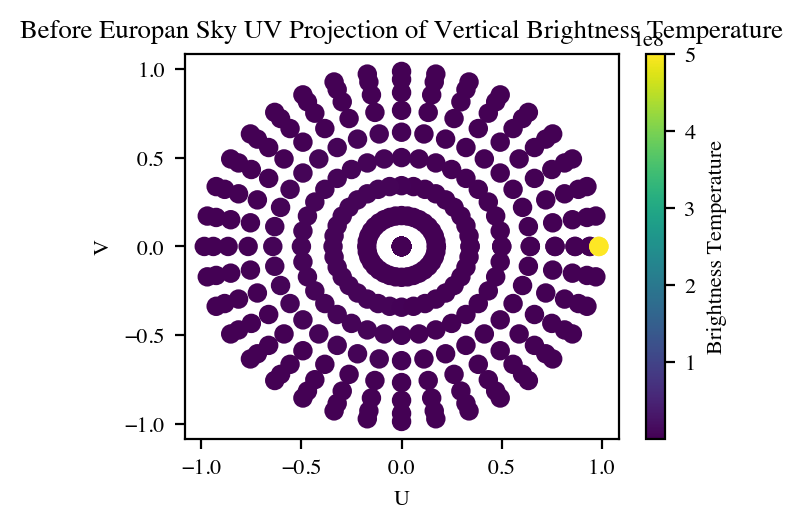

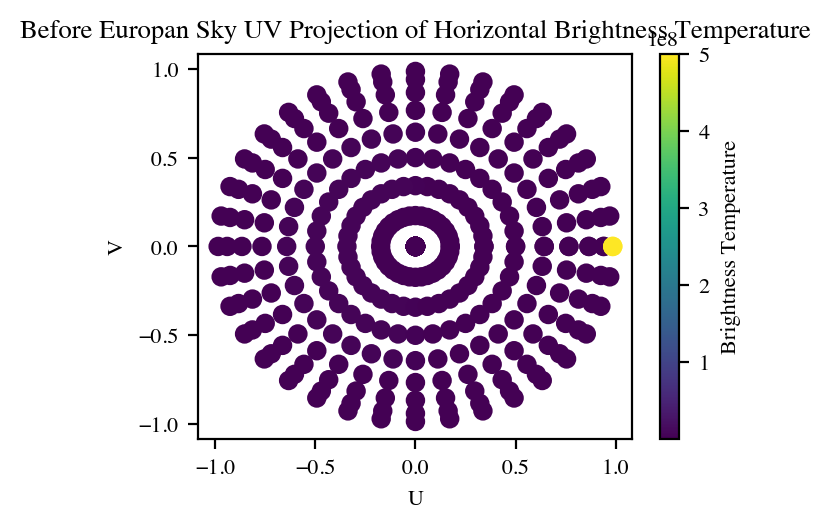

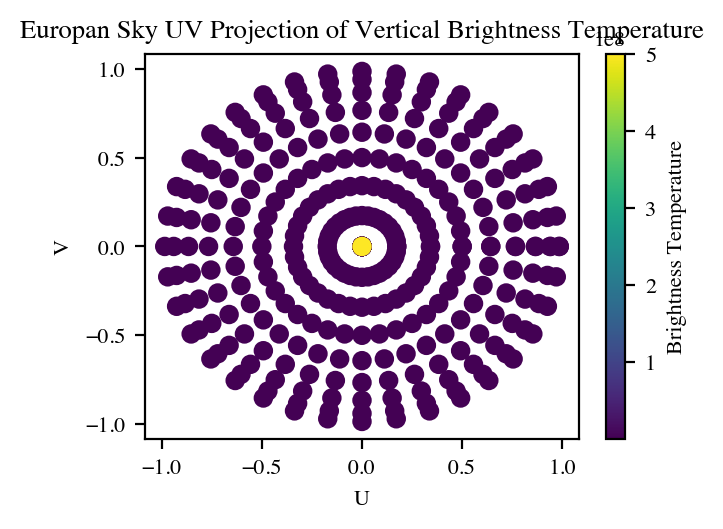

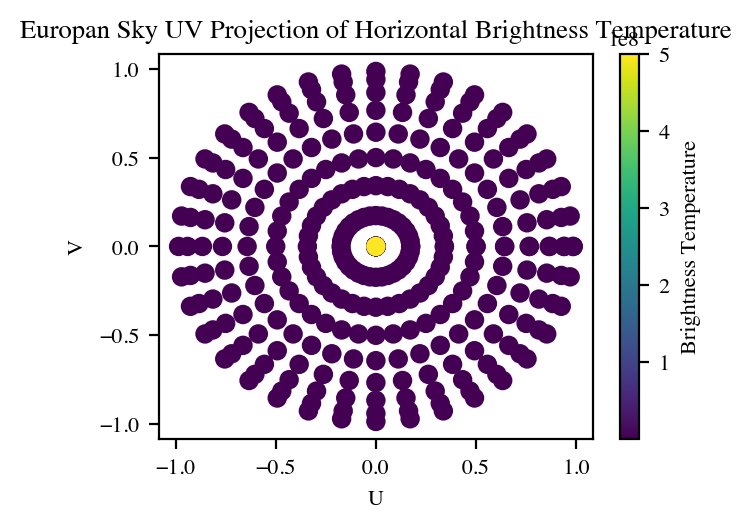

In [63]:
# Plot only the Northern Hemisphere of the brightness temperature
U = (np.sin(ant.theta_grid[0:9]) * np.cos(ant.phi_grid[0:9])).flatten()
V = (np.sin(ant.theta_grid[0:9]) * np.sin(ant.phi_grid[0:9])).flatten()

plt.figure()
plt.scatter(U, V, c=brightness_field_of_europan_sky_vertical_low_band.reshape(ant.theta_grid.shape)[0:9].flatten(), cmap='viridis')
plt.colorbar(label='Brightness Temperature')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Before Europan Sky UV Projection of Vertical Brightness Temperature')
plt.show()

plt.figure()
plt.scatter(U, V, c=brightness_field_of_europan_sky_horizontal_low_band.reshape(ant.theta_grid.shape)[0:9].flatten(), cmap='viridis')
plt.colorbar(label='Brightness Temperature')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Before Europan Sky UV Projection of Horizontal Brightness Temperature')
plt.show()

# Evaluation of the sub-Jovian point on Europa
# Rotate the brightness field pattern so we are standing on the sub-jovian point
brightness_field_of_europan_sky_vertical_low_band = brightness_field_of_europan_sky_vertical_low_band.reshape(ant.theta_grid.shape)
brightness_field_of_europan_sky_horizontal_low_band = brightness_field_of_europan_sky_horizontal_low_band.reshape(ant.theta_grid.shape)
brightness_field_of_europan_sky_vertical_high_band = brightness_field_of_europan_sky_vertical_high_band.reshape(ant.theta_grid.shape)
brightness_field_of_europan_sky_horizontal_high_band = brightness_field_of_europan_sky_horizontal_high_band.reshape(ant.theta_grid.shape)

brightness_field_of_europan_sky_vertical_low_band = \
    np.roll(brightness_field_of_europan_sky_vertical_low_band, 9, 0)
brightness_field_of_europan_sky_horizontal_low_band = \
    np.roll(brightness_field_of_europan_sky_horizontal_low_band, 9, 0)
brightness_field_of_europan_sky_vertical_high_band = \
    np.roll(brightness_field_of_europan_sky_vertical_high_band, 9, 0)
brightness_field_of_europan_sky_horizontal_high_band = \
    np.roll(brightness_field_of_europan_sky_horizontal_high_band, 9, 0)
    
brightness_field_of_europan_sky_vertical_low_band = brightness_field_of_europan_sky_vertical_low_band.flatten()
brightness_field_of_europan_sky_horizontal_low_band = brightness_field_of_europan_sky_horizontal_low_band.flatten()
brightness_field_of_europan_sky_vertical_high_band = brightness_field_of_europan_sky_vertical_high_band.flatten()
brightness_field_of_europan_sky_horizontal_high_band = brightness_field_of_europan_sky_horizontal_high_band.flatten()

plt.figure()
plt.scatter(U, V, c=brightness_field_of_europan_sky_vertical_low_band.reshape(ant.theta_grid.shape)[0:9].flatten(), cmap='viridis')
plt.colorbar(label='Brightness Temperature')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Europan Sky UV Projection of Vertical Brightness Temperature')
plt.show()

plt.figure()
plt.scatter(U, V, c=brightness_field_of_europan_sky_horizontal_low_band.reshape(ant.theta_grid.shape)[0:9].flatten(), cmap='viridis')
plt.colorbar(label='Brightness Temperature')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Europan Sky UV Projection of Horizontal Brightness Temperature')
plt.show()

/var/folders/q_/j0nfhbld0vbcnzffn6594bzh0000gn/T/ipykernel_56057/2133130040.py:52: RuntimeWarning: divide by zero encountered in log
  + 2 * n * np.log(eta_xy) \
/var/folders/q_/j0nfhbld0vbcnzffn6594bzh0000gn/T/ipykernel_56057/1542107412.py:100: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(U.flatten(), V.flatten(), c=10 * np.log10(brightness_temperature_vertical[0:9].flatten()), cmap='viridis')


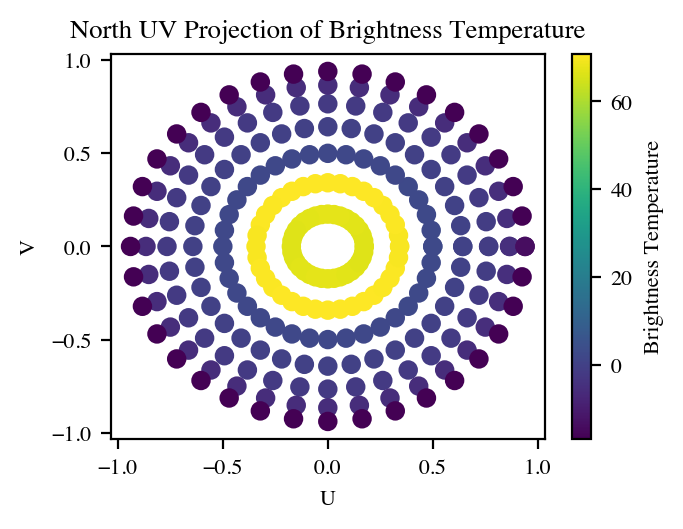

/var/folders/q_/j0nfhbld0vbcnzffn6594bzh0000gn/T/ipykernel_56057/1542107412.py:111: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(U.flatten(), V.flatten(), c=10 * np.log10(brightness_temperature_horizontal[0:9].flatten()), cmap='viridis')


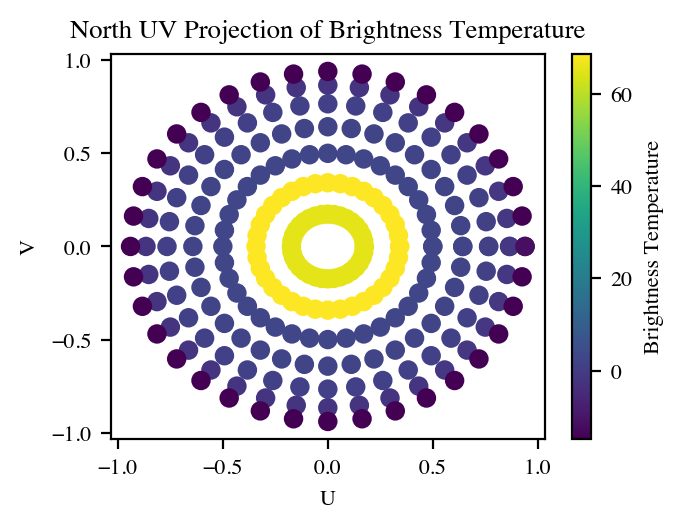

In [66]:
# Integrate the transmitted field by summing to find transmitted field over all incident fields
# Low band
f = mm.low_band_f
epsilon_i_prime = 1
epsilon_t_prime = eim.cryosphere_model_df['epsilon_s_prime'].values[0]
H = 0.75
sigma_ref = 0.2
sigma = sigma_ref * (3e8/5.373e6)**(H)
vertical_bistatic_polarizations = ['vv', 'hv']
horizontal_bistatic_polarizations = ['hh', 'vh']

brightness_field_of_europan_sky_vertical = \
    brightness_field_of_europan_sky_vertical_low_band
brightness_field_of_europan_sky_horizontal = \
    brightness_field_of_europan_sky_horizontal_low_band

brightness_temperature_vertical_low_band = np.zeros_like(ant.theta_grid).flatten()
brightness_temperature_horizontal_low_band = np.zeros_like(ant.theta_grid).flatten()

theta_t_values = ant.theta_grid.flatten()
phi_t_values = ant.phi_grid.flatten()

theta_i_values = ant.theta_grid.flatten()
phi_i_values = ant.phi_grid.flatten()

dtheta = np.pi/20
dphi = np.pi/10

for t in np.arange(ant.directivity_pattern_RHCP.size):
    theta_t = theta_t_values[t]
    phi_t = phi_t_values[t]

    for i in np.arange(ant.directivity_pattern_RHCP.size):
        theta_i = theta_i_values[i]
        phi_i = phi_i_values[i]
        
        if theta_t < np.pi/2 and theta_i < np.pi/2:
            gamma_vv = np.nan_to_num(transmissivity_fBm(
                    f = f, # Hz
                    epsilon_i_prime = epsilon_i_prime,
                    epsilon_t_prime = epsilon_t_prime,
                    sigma_A = sigma,
                    H = H,
                    theta_i = theta_i,
                    phi_t = phi_t - phi_i,
                    theta_t = theta_t,
                    bistatic_polarization='vv'
                ))

            gamma_vh = np.nan_to_num(transmissivity_fBm(
                    f = f, # Hz
                    epsilon_i_prime = epsilon_i_prime,
                    epsilon_t_prime = epsilon_t_prime,
                    sigma_A = sigma,
                    H = H,
                    theta_i = theta_i,
                    phi_t = phi_t - phi_i,
                    theta_t = theta_t,
                    bistatic_polarization='vh'
                ))
            
            gamma_hh = np.nan_to_num(transmissivity_fBm(
                    f = f, # Hz
                    epsilon_i_prime = epsilon_i_prime,
                    epsilon_t_prime = epsilon_t_prime,
                    sigma_A = sigma,
                    H = H,
                    theta_i = theta_i,
                    phi_t = phi_t - phi_i,
                    theta_t = theta_t,
                    bistatic_polarization='hh'
                ))            

            gamma_hv = np.nan_to_num(transmissivity_fBm(
                    f = f, # Hz
                    epsilon_i_prime = epsilon_i_prime,
                    epsilon_t_prime = epsilon_t_prime,
                    sigma_A = sigma,
                    H = H,
                    theta_i = theta_i,
                    phi_t = phi_t - phi_i,
                    theta_t = theta_t,
                    bistatic_polarization='hv'
                ))


            brightness_temperature_vertical_low_band[t] += gamma_vv * brightness_field_of_europan_sky_vertical[i] * dtheta * dphi + \
                gamma_vh * brightness_field_of_europan_sky_horizontal[i] * dtheta * dphi
            brightness_temperature_horizontal_low_band[t] += gamma_hh * brightness_field_of_europan_sky_horizontal[i] * dtheta * dphi+ \
                gamma_hv * brightness_field_of_europan_sky_vertical[i] * dtheta * dphi
            
# Plot only the Northern Hemisphere of the brightness temperature
U = np.sin(ant.theta_grid[0:9]) * np.cos(ant.phi_grid[0:9])
V = np.sin(ant.theta_grid[0:9]) * np.sin(ant.phi_grid[0:9])

brightness_temperature_vertical_low_band = np.sin(ant.theta_grid.flatten()) * brightness_temperature_vertical_low_band / (4 * np.pi)
brightness_temperature_vertical_low_band = brightness_temperature_vertical_low_band.reshape(ant.theta_grid.shape)

plt.figure()
plt.scatter(U.flatten(), V.flatten(), c=10 * np.log10(brightness_temperature_vertical_low_band[0:9].flatten()), cmap='viridis')
plt.colorbar(label='Brightness Temperature')
plt.xlabel('U')
plt.ylabel('V')
plt.title('North UV Projection of Brightness Temperature')
plt.show()

brightness_temperature_horizontal_low_band = np.sin(ant.theta_grid.flatten()) * brightness_temperature_horizontal_low_band / (4 * np.pi)
brightness_temperature_horizontal_low_band = brightness_temperature_horizontal_low_band.reshape(ant.theta_grid.shape)

plt.figure()
plt.scatter(U.flatten(), V.flatten(), c=10 * np.log10(brightness_temperature_horizontal_low_band[0:9].flatten()), cmap='viridis')
plt.colorbar(label='Brightness Temperature')
plt.xlabel('U')
plt.ylabel('V')
plt.title('North UV Projection of Brightness Temperature')
plt.show()

In [ ]:
# Integrate the transmitted field by summing to find transmitted field over all incident fields
# High band
f = mm.high_band_f
epsilon_i_prime = 1
epsilon_t_prime = eim.cryosphere_model_df['epsilon_s_prime'].values[0]
H = 0.75
sigma_ref = 0.2
sigma = sigma_ref * (3e8/f)**(H)
vertical_bistatic_polarizations = ['vv', 'hv']
horizontal_bistatic_polarizations = ['hh', 'vh']

brightness_field_of_europan_sky_vertical = \
    brightness_field_of_europan_sky_vertical_high_band
brightness_field_of_europan_sky_horizontal = \
    brightness_field_of_europan_sky_horizontal_high_band

brightness_temperature_vertical_high_band = np.zeros_like(ant.theta_grid).flatten()
brightness_temperature_horizontal_high_band = np.zeros_like(ant.theta_grid).flatten()

theta_t_values = ant.theta_grid.flatten()
phi_t_values = ant.phi_grid.flatten()

theta_i_values = ant.theta_grid.flatten()
phi_i_values = ant.phi_grid.flatten()

dtheta = np.pi/20
dphi = np.pi/10

for t in np.arange(ant.directivity_pattern_RHCP.size):
    theta_t = theta_t_values[t]
    phi_t = phi_t_values[t]

    for i in np.arange(ant.directivity_pattern_RHCP.size):
        theta_i = theta_i_values[i]
        phi_i = phi_i_values[i]
        
        if theta_t < np.pi/2 and theta_i < np.pi/2:
            gamma_vv = np.nan_to_num(transmissivity_fBm(
                    f = f, # Hz
                    epsilon_i_prime = epsilon_i_prime,
                    epsilon_t_prime = epsilon_t_prime,
                    sigma_A = sigma,
                    H = H,
                    theta_i = theta_i,
                    phi_t = phi_t - phi_i,
                    theta_t = theta_t,
                    bistatic_polarization='vv'
                ))

            gamma_vh = np.nan_to_num(transmissivity_fBm(
                    f = f, # Hz
                    epsilon_i_prime = epsilon_i_prime,
                    epsilon_t_prime = epsilon_t_prime,
                    sigma_A = sigma,
                    H = H,
                    theta_i = theta_i,
                    phi_t = phi_t - phi_i,
                    theta_t = theta_t,
                    bistatic_polarization='vh'
                ))
            
            gamma_hh = np.nan_to_num(transmissivity_fBm(
                    f = f, # Hz
                    epsilon_i_prime = epsilon_i_prime,
                    epsilon_t_prime = epsilon_t_prime,
                    sigma_A = sigma,
                    H = H,
                    theta_i = theta_i,
                    phi_t = phi_t - phi_i,
                    theta_t = theta_t,
                    bistatic_polarization='hh'
                ))            

            gamma_hv = np.nan_to_num(transmissivity_fBm(
                    f = f, # Hz
                    epsilon_i_prime = epsilon_i_prime,
                    epsilon_t_prime = epsilon_t_prime,
                    sigma_A = sigma,
                    H = H,
                    theta_i = theta_i,
                    phi_t = phi_t - phi_i,
                    theta_t = theta_t,
                    bistatic_polarization='hv'
                ))


            brightness_temperature_vertical_high_band[t] += gamma_vv * brightness_field_of_europan_sky_vertical[i] * dtheta * dphi + \
                gamma_vh * brightness_field_of_europan_sky_horizontal[i] * dtheta * dphi
            brightness_temperature_horizontal_high_band[t] += gamma_hh * brightness_field_of_europan_sky_horizontal[i] * dtheta * dphi+ \
                gamma_hv * brightness_field_of_europan_sky_vertical[i] * dtheta * dphi
            
# Plot only the Northern Hemisphere of the brightness temperature
U = np.sin(ant.theta_grid[0:9]) * np.cos(ant.phi_grid[0:9])
V = np.sin(ant.theta_grid[0:9]) * np.sin(ant.phi_grid[0:9])

brightness_temperature_vertical_high_band = np.sin(ant.theta_grid.flatten()) * brightness_temperature_vertical_high_band / (4 * np.pi)
brightness_temperature_vertical_high_band = brightness_temperature_vertical_high_band.reshape(ant.theta_grid.shape)

plt.figure()
plt.scatter(U.flatten(), V.flatten(), c=10 * np.log10(brightness_temperature_vertical_high_band[0:9].flatten()), cmap='viridis')
plt.colorbar(label='Brightness Temperature')
plt.xlabel('U')
plt.ylabel('V')
plt.title('North UV Projection of Brightness Temperature')
plt.show()

brightness_temperature_horizontal_high_band = np.sin(ant.theta_grid.flatten()) * brightness_temperature_horizontal_high_band / (4 * np.pi)
brightness_temperature_horizontal_high_band = brightness_temperature_horizontal_high_band.reshape(ant.theta_grid.shape)

plt.figure()
plt.scatter(U.flatten(), V.flatten(), c=10 * np.log10(brightness_temperature_horizontal_high_band[0:9].flatten()), cmap='viridis')
plt.colorbar(label='Brightness Temperature')
plt.xlabel('U')
plt.ylabel('V')
plt.title('North UV Projection of Brightness Temperature')
plt.show()